In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.read_csv('individuals-using-the-internet.csv')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seriesID           4906 non-null   int64  
 1   seriesCode         4906 non-null   object 
 2   seriesName         4906 non-null   object 
 3   seriesParent       0 non-null      float64
 4   seriesUnits        4906 non-null   object 
 5   entityID           4906 non-null   int64  
 6   entityIso          4906 non-null   object 
 7   entityName         4906 non-null   object 
 8   dataValue          4906 non-null   float64
 9   dataYear           4906 non-null   int64  
 10  dataNote           612 non-null    object 
 11  dataSource         4449 non-null   object 
 12  seriesDescription  4906 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 498.4+ KB


In [194]:
df = df.drop(columns=[
    'seriesID',
    'seriesCode',
    'seriesName',
    'seriesParent',
    'seriesUnits',
    'entityID',
    'entityIso',
    'dataNote',
    'dataSource',
    'seriesDescription'
])

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   entityName  4906 non-null   object 
 1   dataValue   4906 non-null   float64
 2   dataYear    4906 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 115.1+ KB


In [196]:
df = df.rename(columns={
    'entityName': 'Country',
    'dataValue': 'Value',
    'dataYear': 'Year'
})

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4906 non-null   object 
 1   Value    4906 non-null   float64
 2   Year     4906 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 115.1+ KB


In [198]:
df.isna().sum()

Country    0
Value      0
Year       0
dtype: int64

In [199]:
g9 = [
    'United States',
    'China',
    'Germany',
    'India',
    'Japan',
    'United Kingdom',
    'France',
    'Italy',
    'Canada']
df_reduced = df.query('Country in @g9')
df_brazil = df.query('Country == "Brazil"')

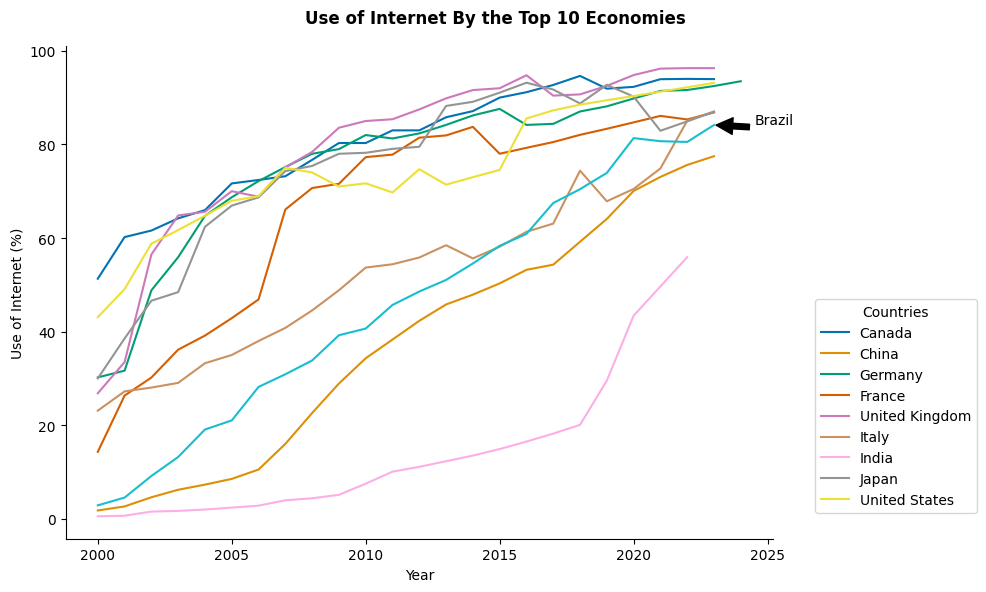

In [200]:
plt.figure(figsize=(10, 6))

ax1 = sns.lineplot(data=df_reduced, x='Year', y='Value', hue='Country', palette="colorblind")
ax2 = sns.lineplot(data=df_brazil, x='Year', y='Value')

last_year = df_brazil['Year'].iloc[-1]
last_value = df_brazil['Value'].iloc[-1]
ax2.annotate(
    'Brazil', 
    xy=(last_year, last_value),
    xytext=(last_year + 1.5, last_value + 1),
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='left',
    va='center'
)

plt.suptitle("Use of Internet By the Top 10 Economies", fontweight='bold')
plt.ylabel("Use of Internet (%)")
sns.despine()
plt.legend(title='Countries', loc='upper left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()